                                       EN2550 - Fundamentals of Image Processing and Machine Vision
                                                         Assignment 2

Index Number : 190280N                    
Name : Jegakumaran P.                
Github Link : 

In [107]:
#Question 1
import numpy as np
from scipy . optimize import minimize
from scipy import linalg
import matplotlib . pyplot as plt
from skimage.measure import CircleModel, ransac
# np.random.seed(0)
N = 100
half_n = N//2
r = 10
s = r/16
t = np.random.uniform(0,2*np.pi,half_n)
n = s*np.random.randn(half_n)
x , y = (r+n)*np.cos(t),(r+n)*np.sin(t)
X_circ = np.hstack((x.reshape(half_n,1),y.reshape(half_n,1)))
m, b = -1,2
x = np.linspace(-12,12,half_n)
y = m*x+b+s*np.random.randn(half_n)
X_line = np.hstack((x.reshape(half_n,1),y.reshape(half_n,1)))
X = np.vstack((X_circ,X_line))

In [108]:
# RANSAC Function
class RANSAC:
	def __init__(self, x_data, y_data, n):
		self.x_data = x_data
		self.y_data = y_data
		self.n = n # n: how many times try sampling
		self.d_min = 99999
		self.best_model = None

	def random_sampling(self):
		sample = []
		save_ran = []
		count = 0

		# get three points from data
		while True:
			ran = np.random.randint(len(self.x_data))

			if ran not in save_ran:
				sample.append((self.x_data[ran], self.y_data[ran]))
				save_ran.append(ran)
				count += 1

				if count == 3:
					break

		return sample

	def make_model(self, sample):
		# calculate A, B, C value from three points by using matrix
	
		pt1 = sample[0]
		pt2 = sample[1]
		pt3 = sample[2]

		A = np.array([[pt2[0] - pt1[0], pt2[1] - pt1[1]], [pt3[0] - pt2[0], pt3[1] - pt2[1]]]) 
		B = np.array([[pt2[0]**2 - pt1[0]**2 + pt2[1]**2 - pt1[1]**2], [pt3[0]**2 - pt2[0]**2 + pt3[1]**2 - pt2[1]**2]])		
		inv_A = np.linalg.inv(A) 

		c_x, c_y = np.dot(inv_A, B) / 2
		c_x, c_y = c_x[0], c_y[0]
		r = np.sqrt((c_x - pt1[0])**2 + (c_y - pt1[1])**2)

		return c_x, c_y, r

	def eval_model(self, model):
		d = 0
		c_x, c_y, r = model

		for i in range(len(self.x_data)):
			dis = np.sqrt((self.x_data[i]-c_x)**2 + (self.y_data[i]-c_y)**2)

			if dis >= r:
				d += dis - r
			else:
				d += r - dis
		
		return d

	def execute_ransac(self):
		# find best model
		for i in range(self.n):
			sample=self.random_sampling()
			model = self.make_model(sample)
			d_temp = self.eval_model(model)
			
			if self.d_min > d_temp:
				self.best_model = model
				self.d_min = d_temp
				best_sample=sample
		return best_sample




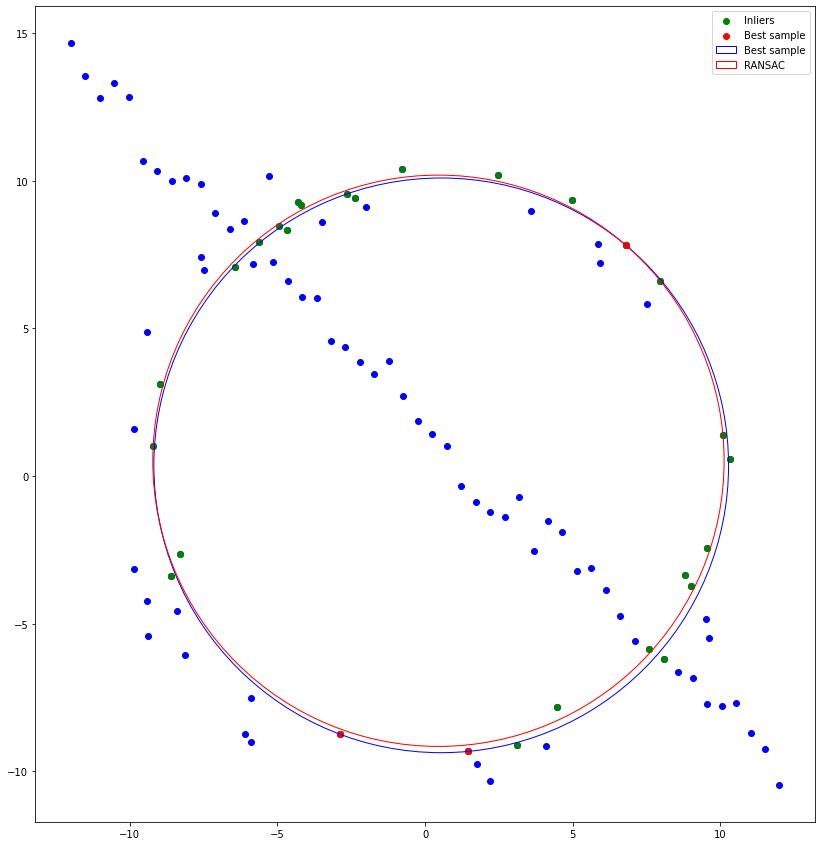

In [109]:
size=len(X[:,0])
ransac = RANSAC(X[:,0],X[:,1], 50)
	
# execute ransac algorithm
sample = ransac.execute_ransac()
	
# get best model from ransac
a, b, r = ransac.best_model[0], ransac.best_model[1], ransac.best_model[2]

threshold=0.5
inliers=[]
for i in range(size):
	if np.sqrt((X[i,0]-a)**2+(X[i,1]-b)**2)<r+threshold and np.sqrt((X[i,0]-a)**2+(X[i,1]-b)**2)>r-threshold:
		inliers.append(np.array(X[i]))
inliers=np.array(inliers)

# show result
plt.figure(figsize=(15,15))
plt.scatter(X[:,0],X[:,1],c='blue', marker='o')
plt.scatter(inliers[:,0],inliers[:,1],c='g',marker='o',label='Inliers')

ransac = RANSAC(inliers[:,0],inliers[:,1], 50)
sample2 = ransac.execute_ransac()
for i in range(len(sample2)):
	sample2[i]=np.array(sample2[i])
sample2=np.array(sample2)
plt.scatter(sample2[:,0],sample2[:,1],c='r',marker='o',label='Best sample')
# get best model from ransac
a_best, b_best, r_best = ransac.best_model[0], ransac.best_model[1], ransac.best_model[2]
circle = plt.Circle((a_best, b_best), radius=r_best, color='b', fc='y', fill=False,label='Best sample')
plt.gca().add_patch(circle)

circle = plt.Circle((a, b), radius=r, color='r', fc='y', fill=False,label='RANSAC')
plt.gca().add_patch(circle)
plt.axis('scaled')
plt.legend()
plt.show()